# Import de la base de dades i de les llibreries a utilitzar
---

## Llibreries
---

In [1]:
import pandas as pd  
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression


## Base de dades
---

In [2]:
df = pd.read_csv('smartphone_data.csv')

In [3]:
df

brand_name                            model  price  rating  has_5g  \
0      oneplus                    OnePlus 11 5G  54999    89.0    True   
1      oneplus        OnePlus Nord CE 2 Lite 5G  19989    81.0    True   
2      samsung            Samsung Galaxy A14 5G  16499    75.0    True   
3     motorola             Motorola Moto G62 5G  14999    81.0    True   
4       realme               Realme 10 Pro Plus  24999    82.0    True   
..         ...                              ...    ...     ...     ...   
975   motorola       Motorola Moto Edge S30 Pro  34990    83.0    True   
976      honor                      Honor X8 5G  14990    75.0    True   
977       poco  POCO X4 GT 5G (8GB RAM + 256GB)  28990    85.0    True   
978   motorola             Motorola Moto G91 5G  19990    80.0    True   
979    samsung           Samsung Galaxy M52s 5G  24990    74.0    True   

     has_nfc  has_ir_blaster processor_brand  num_cores  processor_speed  ...  \
0       True           False      snapdragon        8.0             3.20  ...   
1      False           False      snapdragon        8.0             2.20  ...   
2      False           False          exynos        8.0             2.40  ...   
3      False           False      snapdragon        8.0             2.20  ...   
4      False           False       dimensity        8.0             2.60  ...   
..       ...             ...             ...        ...              ...  ...   
975    False           False      snapdragon        8.0             3.00  ...   
976    False           False      snapdragon        8.0             2.20  ...   
977     True            True       dimensity        8.0             2.85  ...   
978     True           False      snapdragon        8.0             2.20  ...   
979    False           False             NaN        8.0              NaN  ...   

     screen_size  refresh_rate    resolution  num_rear_cameras  \
0           6.70           120  1440 x 3216                  3   
1           6.59           120  1080 x 2412                  3   
2           6.60            90  1080 x 2408                  3   
3           6.55           120  1080 x 2400                  3   
4           6.70           120  1080 x 2412                  3   
..           ...           ...           ...               ...   
975         6.67           120  1080 x 2460                  3   
976         6.50            60   720 x 1600                  3   
977         6.60           144  1080 x 2460                  3   
978         6.80            60  1080 x 2400                  3   
979         6.50            60  1080 x 2400                  3   

     num_front_cameras       os  primary_camera_rear primary_camera_front  \
0                  1.0  android                 50.0                 16.0   
1                  1.0  android                 64.0                 16.0   
2                  1.0  android                 50.0                 13.0   
3                  1.0  android                 50.0                 16.0   
4                  1.0  android                108.0                 16.0   
..                 ...      ...                  ...                  ...   
975                1.0  android                 64.0                 16.0   
976                1.0  android                 48.0                  8.0   
977                1.0  android                 64.0                 16.0   
978                1.0  android                108.0                 32.0   
979                1.0  android                 64.0                 32.0   

     extended_memory_available  extended_upto  
0                            0            NaN  
1                            1         1024.0  
2                            1         1024.0  
3                            1         1024.0  
4                            0            NaN  
..                         ...            ...  
975                          0            NaN  
976                          1         1

# ANÀLISIS I PREPROCESSAT DE DADES
---

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    object 
 13  ram_capacity               980 non-null    float64

In [5]:
df['fast_charging_available'] = df['fast_charging_available'].astype(bool)
df['extended_memory_available'] = df['extended_memory_available'].astype(bool)

Per molt que `fast_charging` sembli una numèrica, realment és una categòrica ja que expressa el tipus de càrrega ràpida. Passa també amb moltes altres variables, com podrien ser `battery_size`, `num_cores`, `ram_capacity` o `screen_size`. Així doncs, tot i que aquestes variables haurien de ser tractades com a categòriques, ja que estan representades com a numèriques, les tractarem com a numèriques per a que el model predictiu pugui ser més precís i obtenir millors resultats, ja que el model que utilitzarem treballa millor amb variables numèriques.

In [6]:
df = df.drop('model', axis=1)

Eliminem la variable ´model´ ja que no aporta cap informació rellevant per a la predicció.

## Analisi univariant de les dades
---

### Analisis de variables categoricas y booleanas

In [7]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'object' or df[feature].dtype == 'bool']
print('Number of categorical and binaria variables: ', len(cat_features))
print('*'*80)
print('Categorical variables column name:', cat_features)
df[cat_features]

Number of categorical and binaria variables:  10
********************************************************************************
Categorical variables column name: ['brand_name', 'has_5g', 'has_nfc', 'has_ir_blaster', 'processor_brand', 'fast_charging_available', 'fast_charging', 'resolution', 'os', 'extended_memory_available']


brand_name  has_5g  has_nfc  has_ir_blaster processor_brand  \
0      oneplus    True     True           False      snapdragon   
1      oneplus    True    False           False      snapdragon   
2      samsung    True    False           False          exynos   
3     motorola    True    False           False      snapdragon   
4       realme    True    False           False       dimensity   
..         ...     ...      ...             ...             ...   
975   motorola    True    False           False      snapdragon   
976      honor    True    False           False      snapdragon   
977       poco    True     True            True       dimensity   
978   motorola    True     True           False      snapdragon   
979    samsung    True    False           False             NaN   

     fast_charging_available fast_charging    resolution       os  \
0                       True         100.0  1440 x 3216   android   
1                       True          33.0  1080 x 2412   android   
2                       True          15.0  1080 x 2408   android   
3                       True           NaN  1080 x 2400   android   
4                       True          67.0  1080 x 2412   android   
..                       ...           ...           ...      ...   
975                     True          68.0  1080 x 2460   android   
976                     True          22.0   720 x 1600   android   
977                     True          67.0  1080 x 2460   android   
978                     True           NaN  1080 x 2400   android   
979                     True           NaN  1080 x 2400   android   

     extended_memory_available  
0                        False  
1                         True  
2                         True  
3                         True  
4                        False  
..                         ...  
975                      False  
976                       True  
977                      False  
978                       True  
979                       True  

[980 rows x 10 columns]

In [8]:

for feature in cat_features:
    # Calculamos el conteo y el porcentaje para cada categoría
    df_count = df[feature].value_counts().reset_index()
    df_count.columns = [feature, 'count']
    df_count['percent'] = 100 * df_count['count'] / df_count['count'].sum()

    # Creamos la gráfica de barras con colores distintos para cada categoría
    fig = px.bar(df_count, x=feature, y='count', text='percent', color=feature)

    # Actualizamos el layout para añadir título y etiquetas
    fig.update_layout(
        title=f'Distribución de la variable {feature}',
        xaxis_title=feature,
        yaxis_title='Conteo'
    )

    # Añadir el porcentaje en las barras
    fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

    fig.show()

https://chat.openai.com/share/06002044-fa85-4c48-927b-a35ceb5b3d0a

In [9]:
# Ver datos únicos para identificar formatos incorrectos
df['fast_charging'].unique()

array(['100.0', '33.0', '15.0', nan, '67.0', '25.0', '120.0', '80.0',
       '6n7.0', '18.0', '45.0', '10.0', '66.0', '44.0', '210.0', '30.0',
       '150.0', '68.0', '50.0', '20.0', '65.0', '180.0', '125.0', '40.0',
       '60.0', '200.0', '240.0', '19.0', '21.0', '135.0', '165.0', '22.0',
       '27.0', '55.0'], dtype=object)

asumim que 6n7.0 es un error tipografic i que realment volien dir 67.0 

In [10]:

df['fast_charging'] = df['fast_charging'].replace('6n7.0', '67.0')

df['fast_charging'].unique()

array(['100.0', '33.0', '15.0', nan, '67.0', '25.0', '120.0', '80.0',
       '18.0', '45.0', '10.0', '66.0', '44.0', '210.0', '30.0', '150.0',
       '68.0', '50.0', '20.0', '65.0', '180.0', '125.0', '40.0', '60.0',
       '200.0', '240.0', '19.0', '21.0', '135.0', '165.0', '22.0', '27.0',
       '55.0'], dtype=object)

In [11]:
df['fast_charging'] = df['fast_charging'].astype(float)

In [12]:
df['processor_brand'].unique()

array(['snapdragon', 'exynos', 'dimensity', 'bionic', 'helio', 'unisoc',
       'tiger', nan, 'google', 'sc9863a', 'spreadtrum', 'fusion', 'kirin',
       'mediatek'], dtype=object)

In [13]:
#cambiamos los valores 'sc9863a' por 'spreadtrum' en la columna 'processor_brand'
df['processor_brand'] = df['processor_brand'].replace('sc9863a', 'spreadtrum')

### Analisis variables numericas

In [14]:
# Seleccionamos solo las columnas numéricas
numerical_columns = df.select_dtypes(include=['number'])

# Generamos la tabla de estadísticas descriptivas
statistics_table = numerical_columns.describe()

# Imprimimos la tabla
statistics_table.describe().round(2).T


count      mean        std     min       25%       50%  \
price                   8.0  99377.04  222952.78  980.00  10624.00  26257.50   
rating                  8.0    168.96     288.07    7.40     70.50     79.13   
num_cores               8.0    127.33     342.12    0.84      6.83      8.00   
processor_speed         8.0    119.06     330.90    0.46      1.84      2.36   
battery_capacity        8.0   5639.66    6848.24  969.00   1618.14   4658.87   
fast_charging           8.0    152.05     259.99   10.00     29.25     40.20   
ram_capacity            8.0    128.29     344.18    1.00      3.69      6.28   
internal_memory         8.0    322.52     421.75    8.00     96.35    128.00   
screen_size             8.0    127.28     344.56    0.35      5.76      6.56   
refresh_rate            8.0    208.91     318.01   28.99     60.00     91.13   
num_rear_cameras        8.0    124.57     345.65    0.78      1.75      2.91   
num_front_cameras       8.0    122.90     344.70    0.17      1.00      1.00   
primary_camera_rear     8.0    175.42     330.59    2.00     30.75     50.16   
primary_camera_front    8.0    137.85     338.73    0.30     10.16     16.00   
extended_upto           8.0    780.37     610.53   32.00    466.72    624.03   

                           75%       max  
price                 36501.58  650000.0  
rating                   85.25     879.0  
num_cores                 8.00     974.0  
processor_speed           2.94     938.0  
battery_capacity       5000.00   22000.0  
fast_charging           109.50     769.0  
ram_capacity             10.50     980.0  
internal_memory         350.78    1024.0  
screen_size               7.01     980.0  
refresh_rate            150.00     980.0  
num_rear_cameras          3.25     980.0  
num_front_cameras         1.27     976.0  
primary_camera_rear      98.00     980.0  
primary_camera_front     27.44     975.0  
extended_upto          1024.00    2048.0

In [15]:
def analisis_estadistic_num(df, numerical_columns):
    for feature in numerical_columns:
        # Histograma
        fig = px.histogram(df, x=feature, marginal="box",
                        title=f'Histograma de {feature}')
        fig.update_layout(xaxis_title=feature, yaxis_title='Conteo')
        fig.show()



In [16]:
analisis_estadistic_num(df, numerical_columns)

## Analisi multivariant
---

c:\Users\artur\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

C:\Users\artur\AppData\Local\Temp\ipykernel_24120\731823189.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



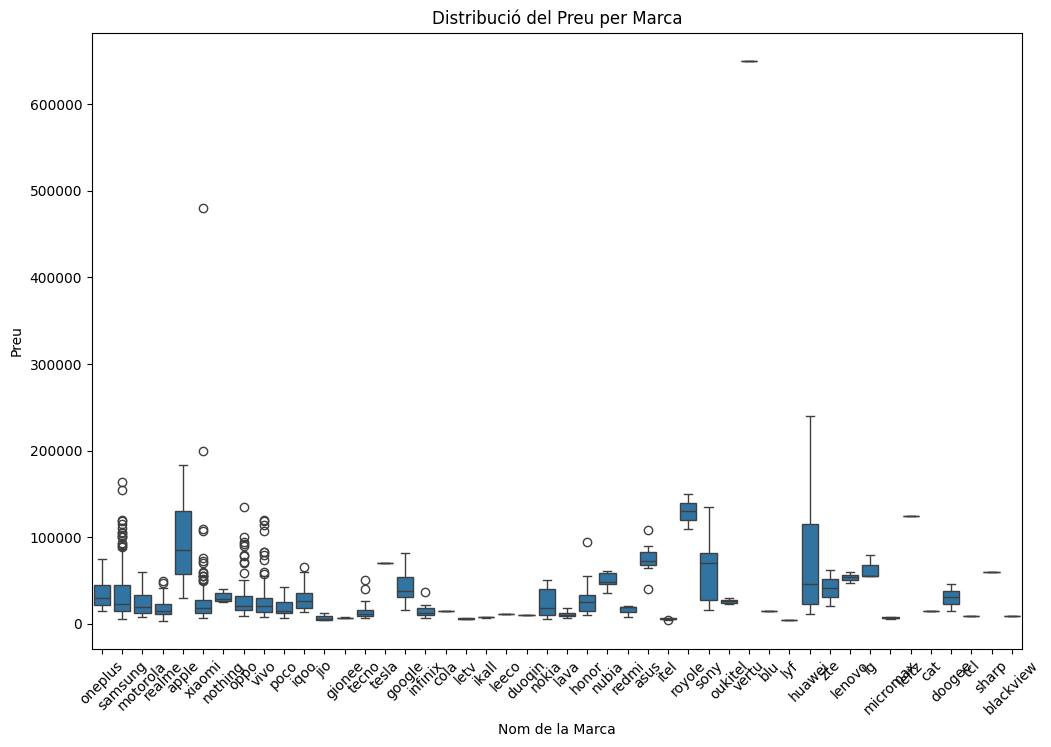

In [17]:

# Creant el boxplot
plt.figure(figsize=(12, 8))  # Ajusta la mida del gràfic segons la teva preferència
boxplot = sns.boxplot(x='brand_name', y='price', data=df)

# Millorant la visualització
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)  # Rota les etiquetes si són massa llargues
boxplot.set_title('Distribució del Preu per Marca')  # Afegeix un títol al gràfic
boxplot.set_xlabel('Nom de la Marca')  # Etiqueta per a l'eix X
boxplot.set_ylabel('Preu')  # Etiqueta per a l'eix Y

plt.show()  # Mostra el gràfic

## Estudi de balanceig de classes
---

Degut a que el objectiu es fer una regresio per predir el preu no fa falta fer un estudi de balanceig de classes, ja que la variable objectiu es continua.

## Estudi de outliers
---

## Estudi de missings
---

In [18]:
numerical_columns = df.select_dtypes(include=['number'])

In [19]:
for feature in numerical_columns:
    # Calculem el nombre de valors absents
    missing_count = df[feature].isnull().sum()
    # Calculem el percentatge de valors absents
    missing_percentage = (missing_count / len(df)) * 100

    if missing_count > 0:
        print(f"La variable {feature} té {missing_count} valors absents, el que representa un {missing_percentage:.2f}%.")
    else:
        print(f"La variable {feature} no té valors absents.")

La variable price no té valors absents.
La variable rating té 101 valors absents, el que representa un 10.31%.
La variable num_cores té 6 valors absents, el que representa un 0.61%.
La variable processor_speed té 42 valors absents, el que representa un 4.29%.
La variable battery_capacity té 11 valors absents, el que representa un 1.12%.
La variable fast_charging té 211 valors absents, el que representa un 21.53%.
La variable ram_capacity no té valors absents.
La variable internal_memory no té valors absents.
La variable screen_size no té valors absents.
La variable refresh_rate no té valors absents.
La variable num_rear_cameras no té valors absents.
La variable num_front_cameras té 4 valors absents, el que representa un 0.41%.
La variable primary_camera_rear no té valors absents.
La variable primary_camera_front té 5 valors absents, el que representa un 0.51%.
La variable extended_upto té 480 valors absents, el que representa un 48.98%.


In [20]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'object' or df[feature].dtype == 'bool']

In [21]:
for feature in cat_features:
    # Calculem el nombre de valors absents
    missing_count = df[feature].isnull().sum()
    # Calculem el percentatge de valors absents
    missing_percentage = (missing_count / len(df)) * 100

    if missing_count > 0:
        print(
            f"La variable {feature} té {missing_count} valors absents, el que representa un {missing_percentage:.2f}%.")
    else:
        print(f"La variable {feature} no té valors absents.")

La variable brand_name no té valors absents.
La variable has_5g no té valors absents.
La variable has_nfc no té valors absents.
La variable has_ir_blaster no té valors absents.
La variable processor_brand té 20 valors absents, el que representa un 2.04%.
La variable fast_charging_available no té valors absents.
La variable resolution no té valors absents.
La variable os té 14 valors absents, el que representa un 1.43%.
La variable extended_memory_available no té valors absents.


INFORME

## Feature creation 
---

### RESOLUTION


Variables Numéricas Separadas para Ancho y Alto:
*Proceso: Puedes separar la resolución indicada como "1080x2400" en dos variables numéricas distintas: una para el ancho (1080) y otra para el alto (2400). Esto te permite conservar la información sobre la dimensión de la pantalla de manera más específica y útil para el modelo.
*Ventajas: Al mantener estas dimensiones como numéricas, tu modelo puede aprender cómo diferentes resoluciones, ya sea más anchas o más altas, afectan al precio. Además, al separarlas, permites que el modelo ajuste independientemente el impacto del ancho y del alto.


separar las dimensiones permite al modelo aprender diferencias específicas en cómo el ancho y el alto afectan al precio, lo cual puede ser más informativo dado que ciertas proporciones de pantalla son más deseables en ciertos mercados o tendencias de diseño.

In [22]:
# Crear nuevas columnas 'width' y 'height'
df[['width', 'height']] = df['resolution'].str.split('x', expand=True).astype(int)

df.drop('resolution', axis=1, inplace=True)

### EXTEND MEMORY

se realizan ajustes específicos en la columna extended_upto con base en los valores de la columna extended_memory_available. La transformación implica dos pasos fundamentales: primero, todos los registros donde extended_memory_available es 0, la columna extended_upto se establece a 0, garantizando que la ausencia de memoria extendida disponible se refleje correctamente como un valor nulo en términos numéricos. Segundo, en los casos donde extended_memory_available es 1 pero extended_upto carece de un valor (NaN), se ajusta este último a NaN para indicar que, aunque la memoria extendida está disponible, la cantidad específica no está definida. Esta metodología asegura coherencia y precisión en la representación de la disponibilidad y especificación de la memoria extendida dentro del conjunto de datos, lo cual es crucial para análisis posteriores que dependan de la integridad y exactitud de estos datos.


In [23]:
# Paso 1: Establecer a 0 donde extended_memory_available es 0
df.loc[df['extended_memory_available'] == 0, 'extended_upto'] = 0

# Paso 2: Establecer a NaN donde extended_memory_available es 1 y extended_upto es NaN
df.loc[(df['extended_memory_available'] == 1) & (df['extended_upto'].isna()), 'extended_upto'] = np.nan

# Opcional: Eliminar la columna extended_memory_available si ya no se necesita
df = df.drop(['extended_memory_available'], axis=1)

### FAST

Lo mismo que extend memory

In [24]:
# Paso 1: Establecer a 0 donde fast_charging_available es 0
df.loc[df['fast_charging_available'] == 0, 'fast_charging'] = 0

# Paso 2: Establecer a NaN donde fast_charging_available es 1 y fast_charging es NaN
df.loc[(df['fast_charging_available'] == 1) & (df['fast_charging'].isna()), 'fast_charging'] = np.nan

# Eliminar la columna fast_charging_available
df = df.drop(['fast_charging_available'], axis=1)

## Partició de les dades
---

### Mezclar

In [25]:
df_shuffled = shuffle(df, random_state=69)

### Partició

In [26]:
train, test = train_test_split(df_shuffled, test_size=0.15, random_state=69)

## Tractament de outliers
---

In [27]:
#convertimos los precios que sean mayores a 190000 a np.nan
train.loc[train['price'] > 190000, 'price'] = np.nan

### Autoimputem missings a la db per veure els millors models per imputar

In [28]:
#convertim tots els nan a np.nan
df = df.replace('nan', np.nan)

In [29]:
# Funció per crear missings de manera controlada
def autoimpute_missing_values(data, missing_rate=0.1):
    df_missing = data.copy()
    for col in df_missing.columns:
        missing_indices = np.random.choice(df_missing.index, int(
            len(df_missing) * missing_rate), replace=False)
        # Reemplazar 'nan' con np.nan
        df_missing.loc[missing_indices, col] = np.where(
            df_missing.loc[missing_indices, col] == 'nan', np.nan, df_missing.loc[missing_indices, col])
    return df_missing

# Autoimputem missings
df_missing = autoimpute_missing_values(df)

C:\Users\artur\AppData\Local\Temp\ipykernel_24120\1714155634.py:8: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1.]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.

C:\Users\artur\AppData\Local\Temp\ipykernel_24120\1714155634.py:8: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1.

In [30]:
# Seleccionem només les columnes numèriques
numeric_cols = df_missing.select_dtypes(include=[np.number]).columns
df_missing_numeric = df_missing[numeric_cols]

# Funció per imputar valors numèrics amb RandomForest o HistGradientBoosting
def impute_numeric(data, cols, model_type='random_forest'):
    imputed_data = data.copy()
    for col in cols:
        # Comprova si hi ha files per imputar
        if imputed_data[col].isnull().sum() > 0:
            # Preparació del conjunt de dades
            train = imputed_data[imputed_data[col].notnull()]
            test = imputed_data[imputed_data[col].isnull()]
            y_train = train[col]
            X_train = train.drop(col, axis=1)
            X_test = test.drop(col, axis=1)

            # Omplir valors NaNs en X_train i X_test
            imputer = SimpleImputer(strategy='mean')
            X_train_imputed = imputer.fit_transform(X_train)
            X_test_imputed = imputer.transform(X_test)

            # Imputació amb el model seleccionat
            if model_type == 'random_forest':
                model = RandomForestRegressor(n_estimators=100)
            else:  # HistGradientBoosting
                model = HistGradientBoostingRegressor()

            model.fit(X_train_imputed, y_train)
            imputed_values = model.predict(X_test_imputed)

            # Assignació dels valors imputats
            imputed_data.loc[imputed_data[col].isnull(), col] = imputed_values


    return imputed_data



# Imputació amb RandomForest o HistGradientBoosting
df_numeric_rf = impute_numeric(df_missing_numeric, numeric_cols, model_type='random_forest')
df_numeric_hgb = impute_numeric(df_missing_numeric, numeric_cols, model_type='hist_gradient_boosting')

# Imputació amb MICE
mice_imputer = IterativeImputer()
df_numeric_mice = df_missing_numeric.copy()
imputed_data = mice_imputer.fit_transform(df_missing_numeric)

df_numeric_mice_imputed = pd.DataFrame(imputed_data, columns=df_missing_numeric.columns, index=df_missing_numeric.index)

In [31]:

# Separació de les variables categòriques
categorical_cols = df_missing.select_dtypes(include=['object']).columns
df_missing_categorical = df_missing[categorical_cols]
df_missing_categorical = df_missing_categorical.replace('NaNN', np.nan)

# Funció per imputar valors categòrics
def impute_categorical(data, cols, method='most_frequent'):
    imputed_data = data.copy()
    for col in cols:
        imputer = SimpleImputer(strategy=method)
        imputed_data[col] = imputer.fit_transform(
            data[[col]]).ravel()  # Convertir en array 1D
    return imputed_data

# Funció per a Hot-Deck Imputation
def hot_deck_imputation(data, cols):
    imputed_data = data.copy()
    for col in cols:
        missing = imputed_data[col].isna()
        if missing.any():
            complete_mask = ~missing
            missing_mask = missing
            imputed_data.loc[missing_mask, col] = imputed_data.loc[complete_mask, col].sample(
                n=missing.sum(), replace=True).values
    return imputed_data


# Imputació amb Moda
df_categorical_mode = impute_categorical(df_missing_categorical, categorical_cols, method='most_frequent')

# Imputació amb Hot-Deck
df_categorical_hot_deck = hot_deck_imputation(df_missing_categorical, categorical_cols)

In [32]:

def calculate_mse(original_data, imputed_data, cols):
    mse_scores = {}
    for col in cols:
        # Comparar només les files on original_data no té NaNs
        mask = original_data[col].notna()
        mse_scores[col] = mean_squared_error(original_data.loc[mask, col], imputed_data.loc[mask, col])
    return mse_scores


def calculate_accuracy(original_data, imputed_data, cols):
    accuracy_scores = {}
    for col in cols:
        # Reindexa imputed_data per coincidir amb original_data
        imputed_col = imputed_data[col].reindex(original_data.index)
        # Només compara on original_data no té NaN
        mask = original_data[col].notna()
        correct = original_data.loc[mask, col] == imputed_col.loc[mask]
        # Utilitza mean() per calcular la precisió
        accuracy_scores[col] = correct.mean()
    return accuracy_scores

#### Provem quins metodes per imputar son els millors

In [33]:
# Avaluar imputacions numèriques
mse_rf = calculate_mse(df[numeric_cols], df_numeric_rf, numeric_cols)
mse_mice = calculate_mse(df[numeric_cols], df_numeric_mice_imputed, numeric_cols)

# Comparar i determinar el millor mètode numèric
best_numeric_method = "Random Forest" if np.mean(list(mse_rf.values())) < np.mean(list(mse_mice.values())) else "MICE"

accuracy_mode = calculate_accuracy(df[categorical_cols], df_categorical_mode, categorical_cols)
accuracy_hot_deck = calculate_accuracy(df[categorical_cols], df_categorical_hot_deck, categorical_cols)


best_categorical_method = "Moda" if np.mean(list(accuracy_mode.values())) > np.mean(list(accuracy_hot_deck.values())) else "Hot-Deck"

print(f"El millor mètode per a dades numèriques és: {best_numeric_method}")
print(f"El millor mètode per a dades categòriques és: {best_categorical_method}")

El millor mètode per a dades numèriques és: MICE
El millor mètode per a dades categòriques és: Hot-Deck


#### Imputem els missings amb els millors metodes

In [34]:

def procesar_e_imputar(dataframe, func_imputar_numericos, func_imputar_categoricos, tipo_modelo='MICE'):
    """
    Procesa e imputa datos numéricos y categóricos para un dataframe dado.

    Parámetres:
        dataframe (pd.DataFrame): El dataframe a procesar.
        func_imputar_numericos (function): La función para imputar datos numéricos.
        func_imputar_categoricos (function): La función para imputar datos categóricos.
        tipo_modelo (str): El tipo de modelo de imputación a utilizar para los datos numéricos.

    Retorna:
        pd.DataFrame: El dataframe con los datos imputados y combinados.
    """
    # Separa los datos numéricos y categóricos
    columnas_numericas = dataframe.select_dtypes(include=[np.number]).columns
    columnas_categoricas = dataframe.select_dtypes(include=['object', 'category']).columns

    df_numericos = dataframe[columnas_numericas]
    df_categoricos = dataframe[columnas_categoricas].replace('NaNN', np.nan)

    # Imputa los datos numéricos
    df_numericos_imputados = func_imputar_numericos(df_numericos, columnas_numericas, model_type=tipo_modelo)

    # Imputa los datos categóricos
    df_categoricos_imputados = func_imputar_categoricos(df_categoricos, columnas_categoricas)

    # Une los datos numéricos y categóricos imputados
    return pd.concat([df_numericos_imputados, df_categoricos_imputados], axis=1)

# Ejemplo de uso de la función
X_train_imputed = procesar_e_imputar(train, impute_numeric, hot_deck_imputation)
X_test_imputed = procesar_e_imputar(test, impute_numeric, hot_deck_imputation)

In [35]:
def calcular_missings(datos):
    # Calcula los missings para cada columna
    missings_antes = datos.isna().sum()
    
    # Simula el preprocesamiento (reemplazo de valores NaN, por ejemplo)
    datos_preprocesados = datos.fillna(0)  # Por ejemplo, reemplazamos NaN con 0
    
    # Calcula los missings después del preprocesamiento
    missings_despues = datos_preprocesados.isna().sum()
    
    return missings_antes, missings_despues

def imprimir_missings(missings_antes, missings_despues, conjunto):
    print(f"Missings antes del preprocessament en {conjunto}:")
    print(missings_antes)
    print(f"\nMissings después del preprocessament en {conjunto}:")
    print(missings_despues)

# Para el conjunto de entrenamiento
missings_before_train, missings_after_train = calcular_missings(train)
imprimir_missings(missings_before_train, missings_after_train, "train")

# Para el conjunto de test
missings_before_test, missings_after_test = calcular_missings(test)
imprimir_missings(missings_before_test, missings_after_test, "test")

Missings antes del preprocessament en train:
brand_name               0
price                    4
rating                  83
has_5g                   0
has_nfc                  0
has_ir_blaster           0
processor_brand         18
num_cores                4
processor_speed         33
battery_capacity         7
fast_charging           59
ram_capacity             0
internal_memory          0
screen_size              0
refresh_rate             0
num_rear_cameras         0
num_front_cameras        3
os                      12
primary_camera_rear      0
primary_camera_front     4
extended_upto           91
width                    0
height                   0
dtype: int64

Missings después del preprocessament en train:
brand_name              0
price                   0
rating                  0
has_5g                  0
has_nfc                 0
has_ir_blaster          0
processor_brand         0
num_cores               0
processor_speed         0
battery_capacity        0
fast_charging

## Codificació de variables

Aplicaremos one-hot ja que ninguna variable categorica sigue un orden

In [36]:
import pandas as pd


# Suponiendo que tus datos están ya cargados en las variables X_train_imputed, X_test_imputed

# Definimos las columnas que queremos codificar
categorical_features = ['brand_name', 'processor_brand', 'os']

# Creamos el encoder especificando que ignore las categorías desconocidas (para manejar cualquier categoría que aparezca en el test pero no en train)
encoder = OneHotEncoder(handle_unknown='ignore')

# Ajustamos el encoder solo en los datos de entrenamiento para evitar el data leakage
encoder.fit(X_train_imputed[categorical_features])

# Transformamos los datos
X_train_encoded = encoder.transform(X_train_imputed[categorical_features]).toarray()
X_test_encoded = encoder.transform(X_test_imputed[categorical_features]).toarray()

# Convertimos los arrays nuevamente a DataFrames para facilitar la manipulación posterior
encoded_columns = encoder.get_feature_names_out(categorical_features)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_columns)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoded_columns)

# Ahora puedes unir estos DataFrames codificados de nuevo con tus datos originales (sin las columnas categóricas originales)
X_train_imputed = X_train_imputed.drop(columns=categorical_features).reset_index(drop=True)
X_test_imputed = X_test_imputed.drop(columns=categorical_features).reset_index(drop=True)

X_train_final = pd.concat([X_train_imputed, X_train_encoded], axis=1)
X_test_final = pd.concat([X_test_imputed, X_test_encoded], axis=1)

# Ahora X_train_final, X_test_final tienen el mismo esquema de columnas y están listos para ser utilizados en modelos.


In [37]:
X_train_final.info()
X_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 75 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       833 non-null    float64
 1   rating                      833 non-null    float64
 2   num_cores                   833 non-null    float64
 3   processor_speed             833 non-null    float64
 4   battery_capacity            833 non-null    float64
 5   fast_charging               833 non-null    float64
 6   ram_capacity                833 non-null    float64
 7   internal_memory             833 non-null    float64
 8   screen_size                 833 non-null    float64
 9   refresh_rate                833 non-null    int64  
 10  num_rear_cameras            833 non-null    int64  
 11  num_front_cameras           833 non-null    float64
 12  primary_camera_rear         833 non-null    float64
 13  primary_camera_front        833 non

## Análisis post processament

In [38]:
# Seleccionamos solo las columnas numéricas
numerical_columns = X_train_final.select_dtypes(include=['number'])

# Generamos la tabla de estadísticas descriptivas
statistics_table = numerical_columns.describe()

# Imprimimos la tabla
statistics_table.describe().round(2).T

count      mean       std     min       25%       50%  \
price                     8.0  39755.11  59330.21  833.00  10624.00  24702.48   
rating                    8.0    163.44    271.79    8.25     70.09     79.18   
num_cores                 8.0    109.70    292.27    0.79      6.84      8.00   
processor_speed           8.0    105.96    293.77    0.47      1.86      2.40   
battery_capacity          8.0   5629.33   6855.92  833.00   1633.48   4654.85   
...                       ...       ...       ...     ...       ...       ...   
processor_brand_tiger     8.0    104.27    294.45    0.00      0.00      0.01   
processor_brand_unisoc    8.0    104.27    294.45    0.00      0.00      0.01   
os_android                8.0    104.77    294.25    0.00      0.77      1.00   
os_ios                    8.0    104.28    294.45    0.00      0.00      0.02   
os_other                  8.0    104.26    294.45    0.00      0.00      0.01   

                             75%       max  
price                   32729.94  182999.0  
rating                     86.40     833.0  
num_cores                   8.00     833.0  
processor_speed             2.94     833.0  
battery_capacity         5000.00   22000.0  
...                          ...       ...  
processor_brand_tiger       0.35     833.0  
processor_brand_unisoc      0.37     833.0  
os_android                  1.00     833.0  
os_ios                      0.41     833.0  
os_other                    0.33     833.0  

[75 rows x 8 columns]

In [39]:
analisis_estadistic_num(X_train_final, numerical_columns)

In [40]:
# quitar varibale objetico
Y_train = X_train_final['price'].copy()
Y_test = X_test_final['price'].copy()

X_train_final.drop('price', axis=1, inplace=True)
X_test_final.drop('price', axis=1, inplace=True)

In [41]:
Y_train = np.log(Y_train)
Y_test = np.log(Y_test)

# PREPARACIÓ DE VARIABLES

### Normalizar las variables.

In [42]:
# Suponiendo que tus DataFrames están almacenados en X_train_final, X_test_final, X_val_final

# Crear el objeto scaler
scaler = StandardScaler()

# Ajustar el scaler solo con los datos de entrenamiento
scaler.fit(X_train_final)

# Transformar los conjuntos de datos
X_train_scaled = scaler.transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)

# Opcionalmente, puedes convertir estos arrays de nuevo a DataFrames para mejor manejo posterior
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_final.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_final.columns)

# Ahora, X_train_scaled y X_test_scaled están normalizados y listos para su uso en modelado

### Analisi de correlacions entre variables numeriques

Matriz de correlación:
                          rating  num_cores  processor_speed  \
rating                  1.000000   0.361314         0.677517   
num_cores               0.361314   1.000000         0.123909   
processor_speed         0.677517   0.123909         1.000000   
battery_capacity        0.064773   0.258850        -0.104510   
fast_charging           0.625816   0.249250         0.567614   
...                          ...        ...              ...   
processor_brand_tiger  -0.182314  -0.006716        -0.182544   
processor_brand_unisoc -0.300065  -0.069343        -0.277946   
os_android              0.007009   0.431714        -0.311372   
os_ios                 -0.046248  -0.489910         0.296137   
os_other                0.078706   0.027972         0.096726   

                        battery_capacity  fast_charging  ram_capacity  \
rating                          0.064773       0.625816      0.802304   
num_cores                       0.258850       0.249250      0

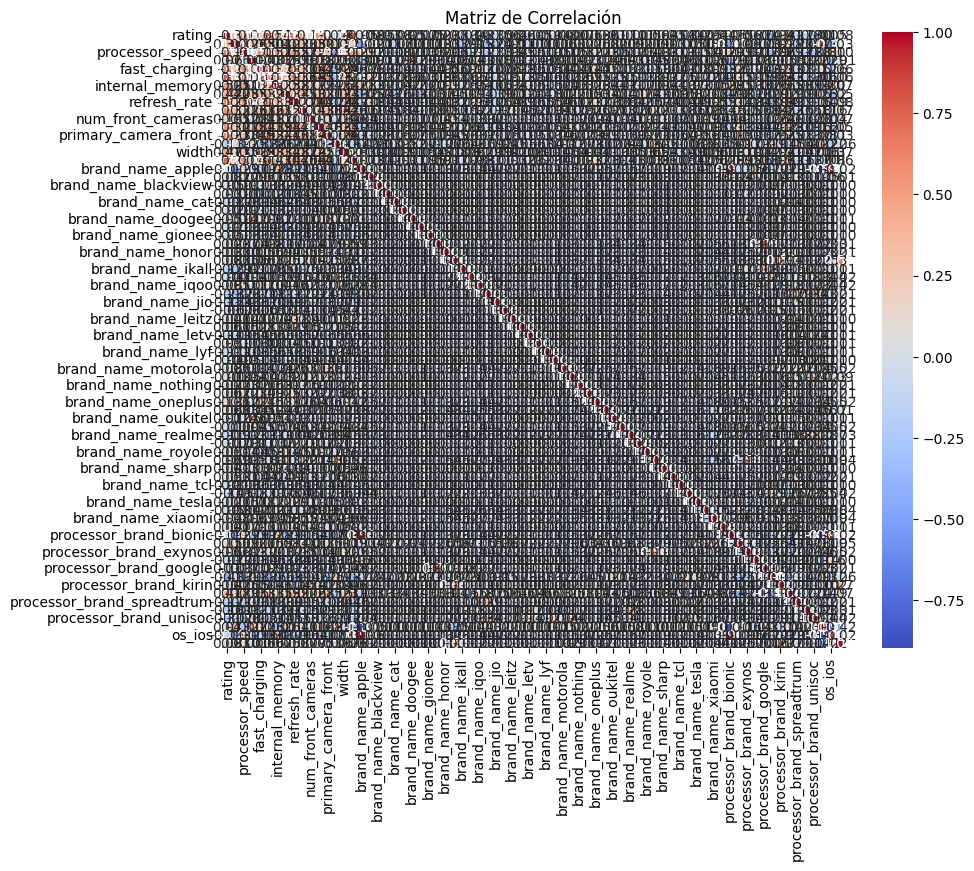

Variables redundantes potenciales basadas en correlaciones altas:
{'brand_name_apple': ['processor_brand_bionic', 'os_android', 'os_ios'], 'processor_brand_bionic': ['brand_name_apple', 'os_android', 'os_ios'], 'os_android': ['brand_name_apple', 'processor_brand_bionic', 'os_ios'], 'os_ios': ['brand_name_apple', 'processor_brand_bionic', 'os_android']}


In [43]:

# Calcula la matriz de correlación usando el coeficiente de Pearson
correlation_matrix = X_train_scaled.corr()
print("Matriz de correlación:")
print(correlation_matrix)

# Visualiza la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,
            cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

# Filtra las correlaciones por encima de 0.85 o por debajo de -0.85, excluyendo la diagonal
high_corr = correlation_matrix[(abs(correlation_matrix) >= 0.85) & (correlation_matrix != 1.0)]
redundant_cols = {col: high_corr[col].dropna().index.tolist(
) for col in high_corr.columns if not high_corr[col].dropna().empty}

print("Variables redundantes potenciales basadas en correlaciones altas:")
print(redundant_cols)

In [64]:
variables_redundantes = ['brand_name_apple', 'processor_brand_bionic', 'os_android']

In [65]:
X_train_sc = X_train_scaled.drop(variables_redundantes, axis=1)
X_test_sc = X_test_scaled.drop(variables_redundantes, axis=1)

### Estudi de dimensionalitat amb PCA

In [66]:
# Aplica PCA
pca = PCA()
pca.fit(X_train_sc)

# Variància explicada
variance_ratio = pca.explained_variance_ratio_

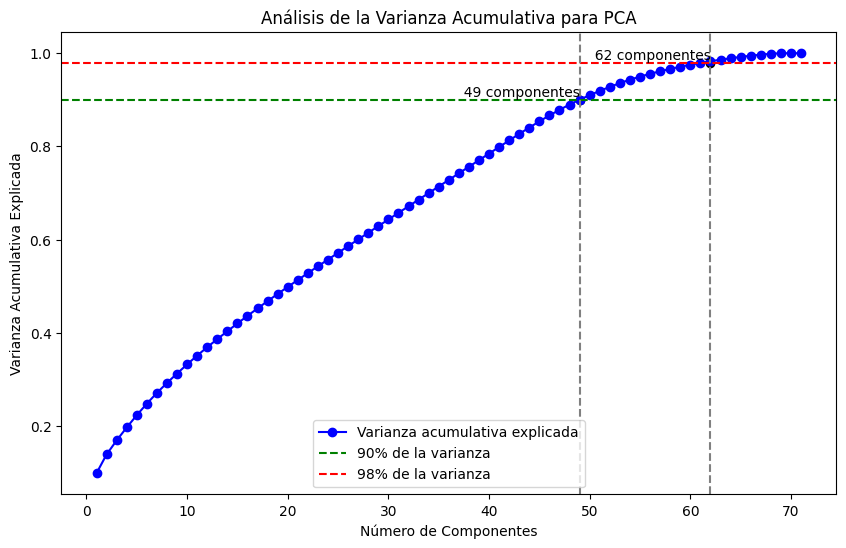

In [67]:
# Calculamos la suma acumulativa de la varianza explicada
varianza_acumulativa = np.cumsum(variance_ratio)

# Encontramos el número de componentes necesarios para explicar al menos el 70-80% de la varianza total
varianza_deseada = [0.90, 0.98]  # 70% a 80% de la varianza total
componentes_necesarios = {umbral: np.argmax(varianza_acumulativa >= umbral) + 1 for umbral in varianza_deseada}

# Creamos el gráfico
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(variance_ratio) + 1), varianza_acumulativa, marker='o', color='blue', label='Varianza acumulativa explicada')
plt.axhline(y=0.90, color='green', linestyle='--', label='90% de la varianza')
plt.axhline(y=0.98, color='red', linestyle='--', label='98% de la varianza')

# Añadimos puntos de interés para el 70% y 80% de la varianza explicada
for umbral, componentes in componentes_necesarios.items():
    plt.axvline(x=componentes, color='grey', linestyle='--')
    plt.scatter(componentes, umbral, color='black')
    plt.text(componentes, umbral, f'  {componentes} componentes',
             verticalalignment='bottom', horizontalalignment='right')

plt.title('Análisis de la Varianza Acumulativa para PCA')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulativa Explicada')
plt.legend()
plt.show()

A partir de 98% ya la pendiente se ve reducida

In [49]:
# Inicialización del PCA con suficiente número de componentes para explicar el 96% de la varianza
pca = PCA(n_components=0.97)

# Ajustamos el PCA solo a los datos de entrenamiento
pca.fit(X_train_sc)

# Transformamos los datos de entrenamiento y prueba
X_train_pca = pca.transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

# Imprimir el número de componentes seleccionados
print(f"Número de componentes seleccionados para el 96% de varianza explicada: {pca.n_components_}")


Número de componentes seleccionados para el 96% de varianza explicada: 59


In [50]:
X_train_pca.shape

(833, 59)

In [51]:
X_train_models = X_train_pca.copy()
X_test_models = X_test_pca.copy()

# MODELITZACIÓ


## Model lineal base
---

### Entrenar i avaluar
Entrenar i avaluar un model de regressió lineal o regressió logística segons la natura del problema (regressió o classificació). Entrenarem un model de regressió lineal per predir el preu dels dispositius mòbils, per tant el problema és de regressió.

In [68]:
from sklearn.metrics import accuracy_score, f1_score
# Creación del modelo de regresión lineal
modelo = LinearRegression()

# Entrenamiento del modelo con los datos de entrenamiento
modelo.fit(X_train_models, Y_train)

# Predicción de los precios en el conjunto de entrenamiento
Y_pred = modelo.predict(X_train_models)
Y_pred_test = modelo.predict(X_test_models)

# Cálculo del error cuadrático medio (MSE), la precision y el coeficiente de determinación (R^2)
mse = mean_squared_error(Y_train, Y_pred)
r2 = r2_score(Y_train, Y_pred)
precision = modelo.score(X_train_models, Y_train)

r2_test = r2_score(Y_test, Y_pred_test)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R^2): {r2}")
print(f"Coeficiente de Determinación (R^2) en el test: {r2_test}")


Error Cuadrático Medio (MSE): 0.050889877546878126
Coeficiente de Determinación (R^2): 0.9128655906028266
Coeficiente de Determinación (R^2) en el test: 0.6912516123313202


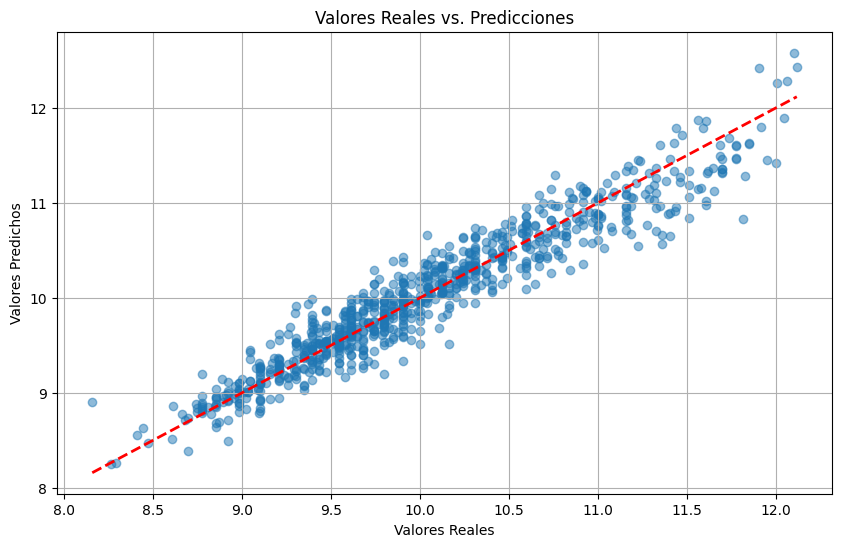

In [69]:
import matplotlib.pyplot as plt

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(Y_train, Y_pred, alpha=0.5)
plt.title('Valores Reales vs. Predicciones')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')

# Dibujar una línea de perfecta predicción
plt.plot([min(Y_train), max(Y_train)], [min(Y_train), max(Y_train)],
         color='red', linestyle='--', lw=2)
plt.grid(True)
plt.show()

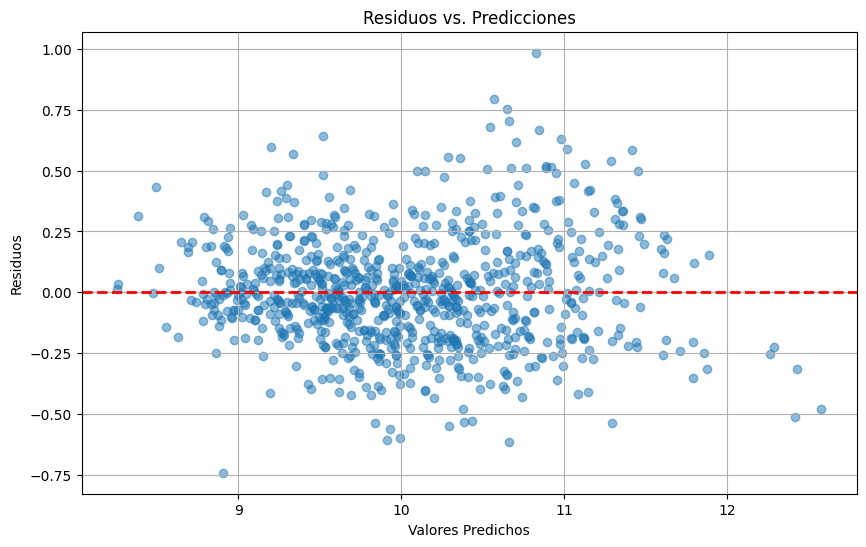

In [54]:
# Cálculo de residuos
residuos = Y_train - Y_pred

# Gráfico de residuos
plt.figure(figsize=(10, 6))
plt.scatter(Y_pred, residuos, alpha=0.5)
plt.title('Residuos vs. Predicciones')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.grid(True)
plt.show()

### Interpretar els resultats obtinguts

El model explica aproximadament el 66.21% de la variabilitat en els preus dels telèfons mòbils, basant-se en les seves característiques. El valor de R² és raonablement alt per ser un model inicial, la qual cosa suggereix que s'ha realitzat un bon preprocesament de les dades.

La majoria dels residus semblen estar concentrats prop de la línia zero, especialment per a valors predits entre -1 i 4. Això generalment és un bon indicador i mostra que el model és prou precís per a la majoria de les prediccions.

No s'observa cap tendència clara o sistemàtica en els residus, com podria ser un patró en forma de embut o curvilini, el que és positiu perquè indica que el model no pateix d'heteroscedasticitat.

Existeixen alguns punts significativament allunyats de la línia zero, especialment un en particular prop del valor 17 en l'eix de residus, el que podria indicar la presència d'un valor atípic.


## Procés iteratiu (MLP)
---

In [55]:
import itertools
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist, fashion_mnist

from keras.optimizers import SGD, Adam
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, fetch_covtype, fetch_california_housing
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score

In [56]:
def plot_curves(history):

  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  train_r2 = history.history['r2_score']
  val_r2 = history.history['val_r2_score']
  epochs = range(1, len(train_loss) + 1)

  fig, axes = plt.subplots(1, 2, figsize=(14, 5))

  axes[0].plot(epochs, train_loss, 'g-', label='Training Loss')
  axes[0].plot(epochs, val_loss, 'orange', label='Validation Loss')
  axes[0].set_title('Training and Validation Loss')
  axes[0].set_xlabel('Epochs')
  axes[0].set_ylabel('Loss')
  axes[0].legend()
  axes[0].grid(True)


  axes[1].set_title('Training and Validation r2_score')
  axes[1].plot(epochs, train_r2, 'g-', label='Training r2_score')
  axes[1].plot(epochs, val_r2, 'orange', label='Validation r2_score')
  axes[1].set_xlabel('Epochs')
  axes[1].set_ylabel('r2-Score')
  axes[1].legend()
  axes[1].grid(True)

  plt.tight_layout()

  plt.show()




### Primer Model

Farem un primer model arbitrari amb 1 sola capa que tindra les mateixes neurones que variables tenim a la abse de dades i una funció d'activacio relu, amb una capa de sortida amb funció identitat ja que es un problema de regressió.

Epoch 1/400


c:\Users\artur\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



11/11 - 1s - 88ms/step - loss: 93.2814 - r2_score: -1.5728e+02 - val_loss: 93.8802 - val_r2_score: -1.6581e+02
Epoch 2/400
11/11 - 0s - 8ms/step - loss: 93.2326 - r2_score: -1.5720e+02 - val_loss: 93.8415 - val_r2_score: -1.6574e+02
Epoch 3/400
11/11 - 0s - 8ms/step - loss: 93.1865 - r2_score: -1.5713e+02 - val_loss: 93.8041 - val_r2_score: -1.6568e+02
Epoch 4/400
11/11 - 0s - 9ms/step - loss: 93.1412 - r2_score: -1.5704e+02 - val_loss: 93.7665 - val_r2_score: -1.6561e+02
Epoch 5/400
11/11 - 0s - 8ms/step - loss: 93.0954 - r2_score: -1.5697e+02 - val_loss: 93.7288 - val_r2_score: -1.6554e+02
Epoch 6/400
11/11 - 0s - 8ms/step - loss: 93.0499 - r2_score: -1.5689e+02 - val_loss: 93.6904 - val_r2_score: -1.6547e+02
Epoch 7/400
11/11 - 0s - 8ms/step - loss: 93.0042 - r2_score: -1.5681e+02 - val_loss: 93.6526 - val_r2_score: -1.6541e+02
Epoch 8/400
11/11 - 0s - 8ms/step - loss: 92.9589 - r2_score: -1.5674e+02 - val_loss: 93.6141 - val_r2_score: -1.6534e+02
Epoch 9/400
11/11 - 0s - 9ms/step -

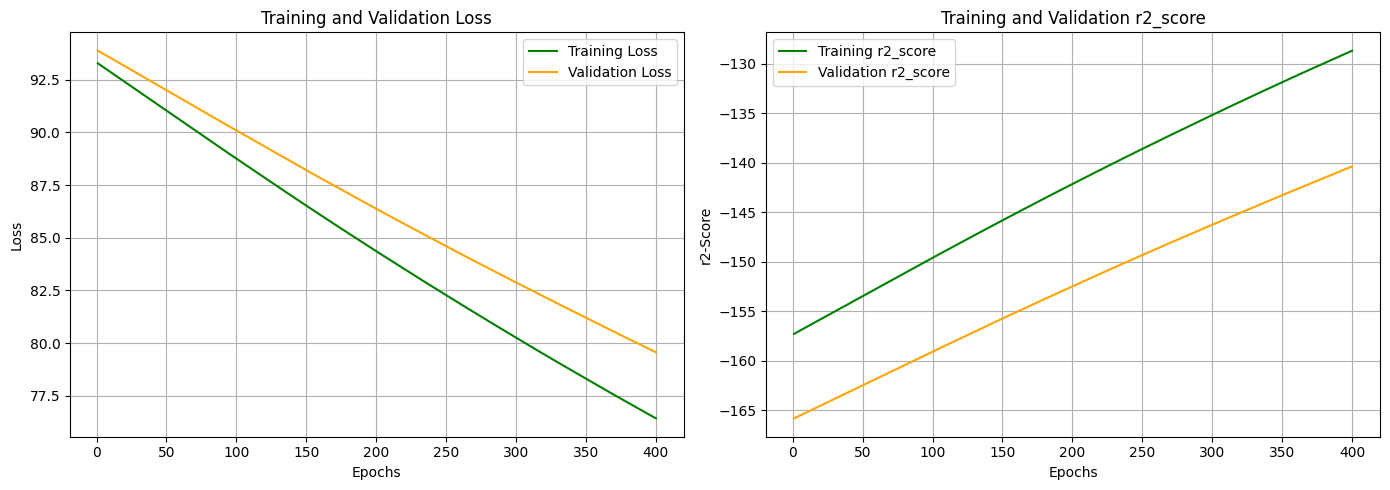

In [72]:
# Define the model
model1 = Sequential()
model1.add(Input(shape=(X_train_models.shape[1],))) 
model1.add(Dense(X_test_models.shape[1], activation='relu', input_shape=(X_train_models.shape[1],))) 
model1.add(Dense(1))

# Define the optimizer and learning rate
learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model1.compile(optimizer=optimizer, loss='mean_squared_error', metrics = ['r2_score']) # Utilizamos MSE para regresión en lugar de entropía cruzada categórica


# Train the model
num_epochs = 00
batch_size = 64
history = model1.fit(X_train_models, Y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.2, verbose=2)

# Evaluate the model
loss = model1.evaluate(X_train_models, Y_train)
print("Train Loss:", loss)
test_loss = model1.evaluate(X_test_models, Y_test)
print("Test Loss:", test_loss)


# Plot learning curves
plot_curves(history)


In [73]:
model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │         1,920 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,762 (22.51 KB)

 Trainable params: 1,920 (7.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,842 (15.01 KB)

### Segon Model

Com que la grafica no ha arribat a estabilitzar-se, volem incrementar el numero de epochs i el learning rate (400 -> 800 i 0.0001 -> 0.001 respectivament).

`Do not pass an 'input_shape'/'input_dim' argument to a layer. When using Sequential models, prefer using an 'Input(shape)' object as the first layer in the model instead.`

Al obtenir aquest warning hem decidit crear aquesta primera capa 'Input' amb el nombre de variables que tenim a la base de dades. 

Epoch 1/800
11/11 - 2s - 148ms/step - loss: 97.2402 - r2_score: -1.6400e+02 - val_loss: 91.7998 - val_r2_score: -1.6211e+02
Epoch 2/800
11/11 - 0s - 9ms/step - loss: 88.3858 - r2_score: -1.4897e+02 - val_loss: 84.4623 - val_r2_score: -1.4908e+02
Epoch 3/800
11/11 - 0s - 9ms/step - loss: 80.3155 - r2_score: -1.3528e+02 - val_loss: 77.4916 - val_r2_score: -1.3669e+02
Epoch 4/800
11/11 - 0s - 8ms/step - loss: 72.7654 - r2_score: -1.2247e+02 - val_loss: 70.8008 - val_r2_score: -1.2480e+02
Epoch 5/800
11/11 - 0s - 8ms/step - loss: 65.7112 - r2_score: -1.1050e+02 - val_loss: 64.4199 - val_r2_score: -1.1346e+02
Epoch 6/800
11/11 - 0s - 9ms/step - loss: 58.9945 - r2_score: -9.9105e+01 - val_loss: 58.3151 - val_r2_score: -1.0262e+02
Epoch 7/800
11/11 - 0s - 10ms/step - loss: 52.6531 - r2_score: -8.8346e+01 - val_loss: 52.4390 - val_r2_score: -9.2176e+01
Epoch 8/800
11/11 - 0s - 9ms/step - loss: 46.6734 - r2_score: -7.8196e+01 - val_loss: 46.7310 - val_r2_score: -8.2034e+01
Epoch 9/800
11/11 - 0

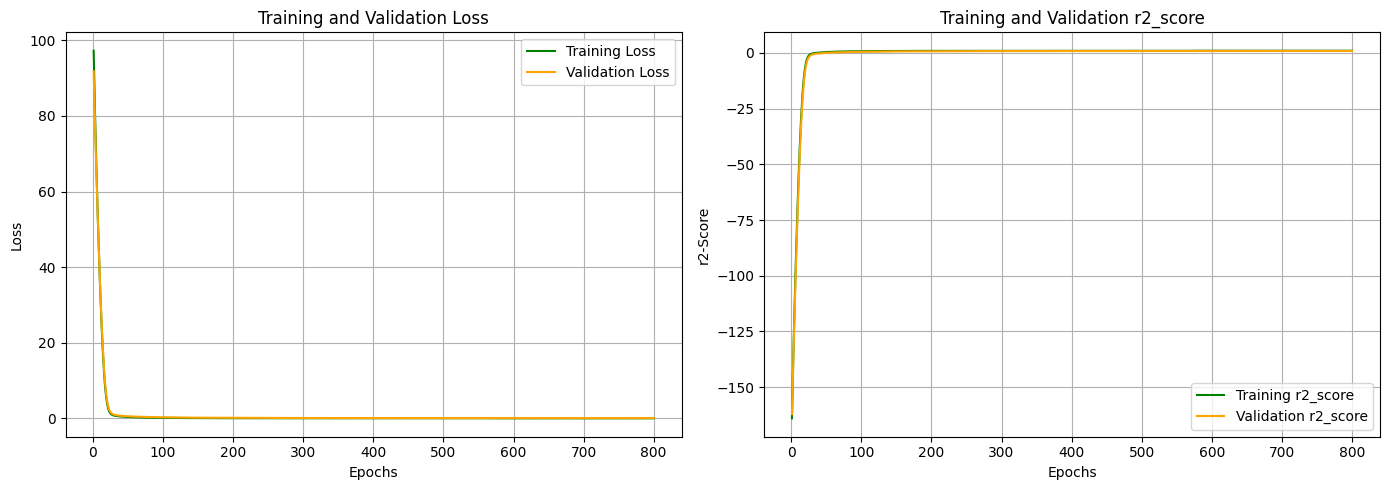

In [74]:
# Define the model
model2 = Sequential()
model2.add(Input(shape=(X_train_models.shape[1],))) 
model2.add(Dense(X_test_models.shape[1], activation='relu')) #
model2.add(Dense(1))

# Compile the model
model2.compile(optimizer=Adam(learning_rate = 0.001), loss='mean_squared_error', metrics = ['r2_score']) # Utilizamos MSE para regresión en lugar de entropía cruzada categórica

# # Define early stopping callback
# early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10, verbose=1, restore_best_weights=True)

# Train the model
num_epochs = 800
batch_size = 64
history = model2.fit(X_train_models, Y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.2, verbose=2)

# Evaluate the model
loss = model2.evaluate(X_train_models, Y_train)
print("Train Loss:", loss)
test_loss = model2.evaluate(X_test_models, Y_test)
print("Test Loss:", test_loss)


# Plot learning curves
plot_curves(history)

In [ ]:
model2.summary()

Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_76 (Dense)                │ (None, 57)             │         3,306 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 1)              │            58 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,094 (39.43 KB)

 Trainable params: 3,364 (13.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,730 (26.29 KB)

### Tercer model

Hem vist que el model arribava a un punt en el que ja no milloraba el resultat, per tant afegirem un early stopping.

Epoch 1/800
11/11 - 2s - 162ms/step - loss: 96.8602 - r2_score: -1.6336e+02 - val_loss: 91.1405 - val_r2_score: -1.6094e+02
Epoch 2/800
11/11 - 0s - 15ms/step - loss: 87.1061 - r2_score: -1.4681e+02 - val_loss: 82.9343 - val_r2_score: -1.4636e+02
Epoch 3/800
11/11 - 0s - 7ms/step - loss: 78.3029 - r2_score: -1.3187e+02 - val_loss: 75.3748 - val_r2_score: -1.3293e+02
Epoch 4/800
11/11 - 0s - 7ms/step - loss: 70.2431 - r2_score: -1.1819e+02 - val_loss: 68.1809 - val_r2_score: -1.2015e+02
Epoch 5/800
11/11 - 0s - 7ms/step - loss: 62.7718 - r2_score: -1.0551e+02 - val_loss: 61.3293 - val_r2_score: -1.0797e+02
Epoch 6/800
11/11 - 0s - 9ms/step - loss: 55.8013 - r2_score: -9.3686e+01 - val_loss: 54.8998 - val_r2_score: -9.6549e+01
Epoch 7/800
11/11 - 0s - 7ms/step - loss: 49.3554 - r2_score: -8.2749e+01 - val_loss: 48.8039 - val_r2_score: -8.5717e+01
Epoch 8/800
11/11 - 0s - 7ms/step - loss: 43.3157 - r2_score: -7.2503e+01 - val_loss: 43.1341 - val_r2_score: -7.5643e+01
Epoch 9/800
11/11 - 0

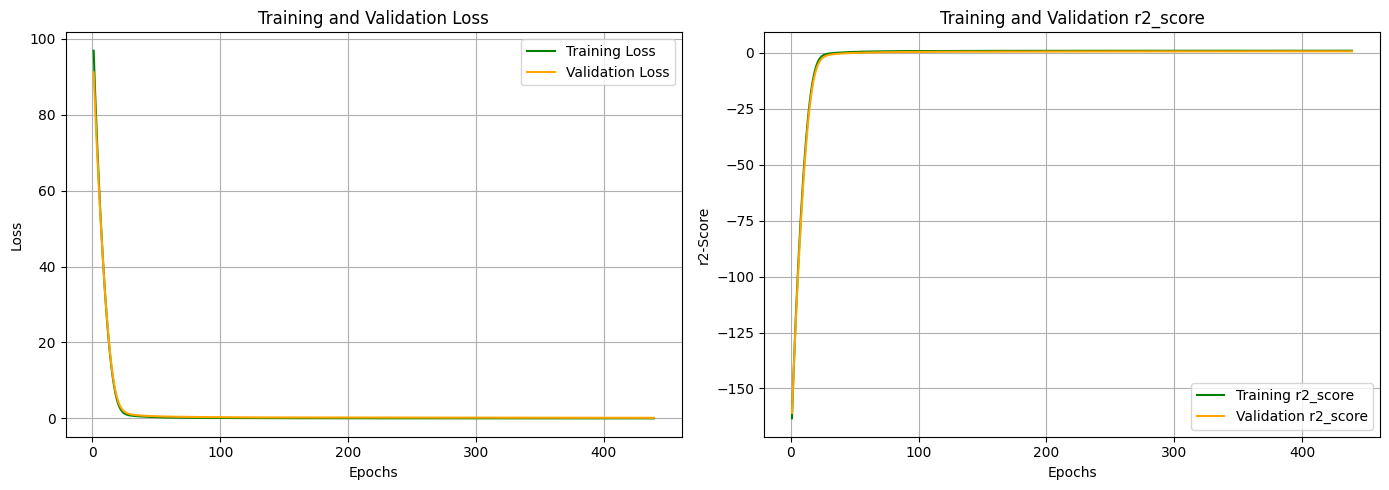

In [76]:
# Define the model
model3 = Sequential()
model3.add(Input(shape=(X_train_models.shape[1],)))
model3.add(Dense(X_test_models.shape[1], activation='relu'))
model3.add(Dense(1))

# Compile the model
model3.compile(optimizer=Adam(learning_rate = 0.001), loss='mean_squared_error', metrics = ['r2_score']) # Utilizamos MSE para regresión en lugar de entropía cruzada categórica

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=20, verbose=1, restore_best_weights=True)


# Train the model
history = model3.fit(X_train_models, Y_train, epochs=800, batch_size=64, validation_split=0.2, verbose=2, callbacks=[early_stopping])

# Evaluate the model
loss = model3.evaluate(X_train_models, Y_train)
print("Train Loss:", loss)
test_loss = model3.evaluate(X_test_models, Y_test)
print("Test Loss:", test_loss)


# Plot learning curves
plot_curves(history)

In [ ]:
model3.summary()

Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_80 (Dense)                │ (None, 57)             │         3,306 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 1)              │            58 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,094 (39.43 KB)

 Trainable params: 3,364 (13.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,730 (26.29 KB)

### Quart model

Intentem fer que no començi amb uns valors de loss y de r2 tan dolents, per tant intentem incialitzar la capa amb valors que no siguin 0.

Epoch 1/800
11/11 - 1s - 117ms/step - loss: 106.6369 - r2_score: -1.7995e+02 - val_loss: 98.8028 - val_r2_score: -1.7456e+02
Epoch 2/800
11/11 - 0s - 8ms/step - loss: 94.5596 - r2_score: -1.5945e+02 - val_loss: 89.0776 - val_r2_score: -1.5728e+02
Epoch 3/800
11/11 - 0s - 7ms/step - loss: 83.8078 - r2_score: -1.4121e+02 - val_loss: 79.9805 - val_r2_score: -1.4111e+02
Epoch 4/800
11/11 - 0s - 7ms/step - loss: 74.0603 - r2_score: -1.2467e+02 - val_loss: 71.6257 - val_r2_score: -1.2627e+02
Epoch 5/800
11/11 - 0s - 13ms/step - loss: 65.3298 - r2_score: -1.0985e+02 - val_loss: 63.8851 - val_r2_score: -1.1251e+02
Epoch 6/800
11/11 - 0s - 7ms/step - loss: 57.4115 - r2_score: -9.6417e+01 - val_loss: 56.7822 - val_r2_score: -9.9894e+01
Epoch 7/800
11/11 - 0s - 7ms/step - loss: 50.3001 - r2_score: -8.4352e+01 - val_loss: 50.2907 - val_r2_score: -8.8359e+01
Epoch 8/800
11/11 - 0s - 7ms/step - loss: 43.9326 - r2_score: -7.3545e+01 - val_loss: 44.2819 - val_r2_score: -7.7682e+01
Epoch 9/800
11/11 - 

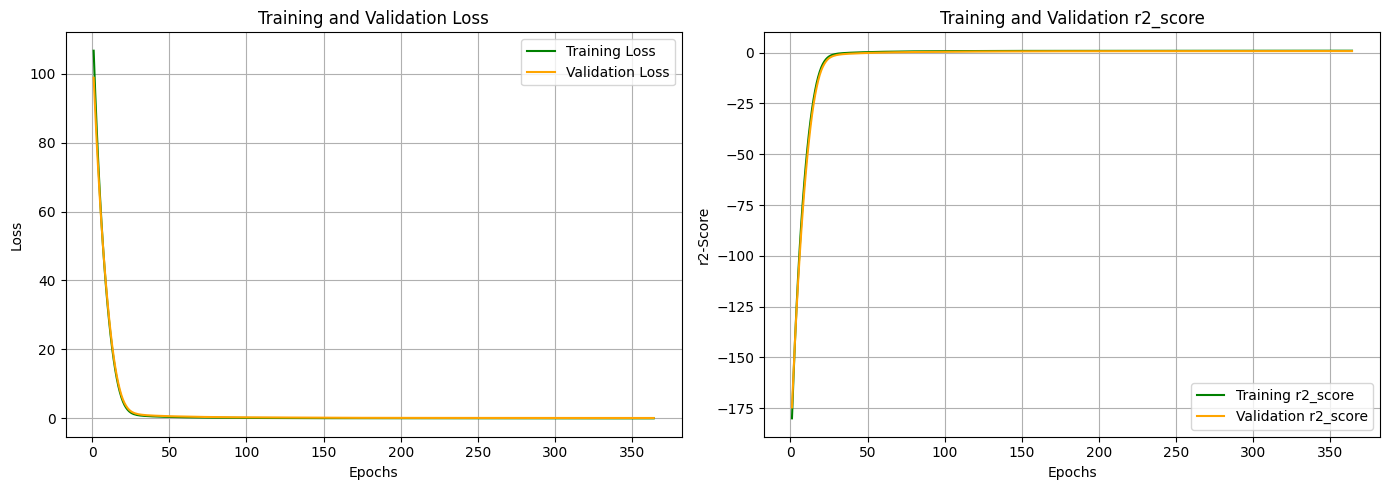

In [79]:
from tensorflow.keras.initializers import HeNormal

# Define the model
model4 = Sequential()
model4.add(Input(shape=(X_train_models.shape[1],)))
# Utilizar He Normal para la inicialización de pesos
model4.add(Dense(X_test_models.shape[1], activation='relu', kernel_initializer=HeNormal()))
model4.add(Dense(1))

# Compile the model
model4.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['r2_score'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=20, verbose=1, restore_best_weights=True)

# Train the model
history = model4.fit(X_train_models, Y_train, epochs=800, batch_size=64, validation_split=0.2, verbose=2, callbacks=[early_stopping])

# Evaluate the model
loss = model4.evaluate(X_train_models, Y_train)
print("Train Loss:", loss)
test_loss = model4.evaluate(X_test_models, Y_test)
print("Test Loss:", test_loss)
# Plot learning curves (assuming 'plot_curves' is previously defined)



In [82]:
model4.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 59)             │         3,540 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,802 (42.20 KB)

 Trainable params: 3,600 (14.06 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,202 (28.14 KB)

### Cinquè model

Hem vist que genera overfiting

Epoch 1/800
11/11 - 1s - 90ms/step - loss: 108.9492 - r2_score: -1.7726e+02 - val_loss: 103.3845 - val_r2_score: -1.7582e+02
Epoch 2/800
11/11 - 0s - 7ms/step - loss: 99.7201 - r2_score: -1.6167e+02 - val_loss: 95.7991 - val_r2_score: -1.6240e+02
Epoch 3/800
11/11 - 0s - 7ms/step - loss: 91.2184 - r2_score: -1.4728e+02 - val_loss: 88.6238 - val_r2_score: -1.4968e+02
Epoch 4/800
11/11 - 0s - 8ms/step - loss: 83.4908 - r2_score: -1.3418e+02 - val_loss: 81.8226 - val_r2_score: -1.3760e+02
Epoch 5/800
11/11 - 0s - 7ms/step - loss: 76.2086 - r2_score: -1.2182e+02 - val_loss: 75.3261 - val_r2_score: -1.2604e+02
Epoch 6/800
11/11 - 0s - 7ms/step - loss: 69.3731 - r2_score: -1.1020e+02 - val_loss: 69.1465 - val_r2_score: -1.1502e+02
Epoch 7/800
11/11 - 0s - 7ms/step - loss: 62.8624 - r2_score: -9.9118e+01 - val_loss: 63.1938 - val_r2_score: -1.0440e+02
Epoch 8/800
11/11 - 0s - 8ms/step - loss: 56.7339 - r2_score: -8.8673e+01 - val_loss: 57.4983 - val_r2_score: -9.4232e+01
Epoch 9/800
11/11 - 0

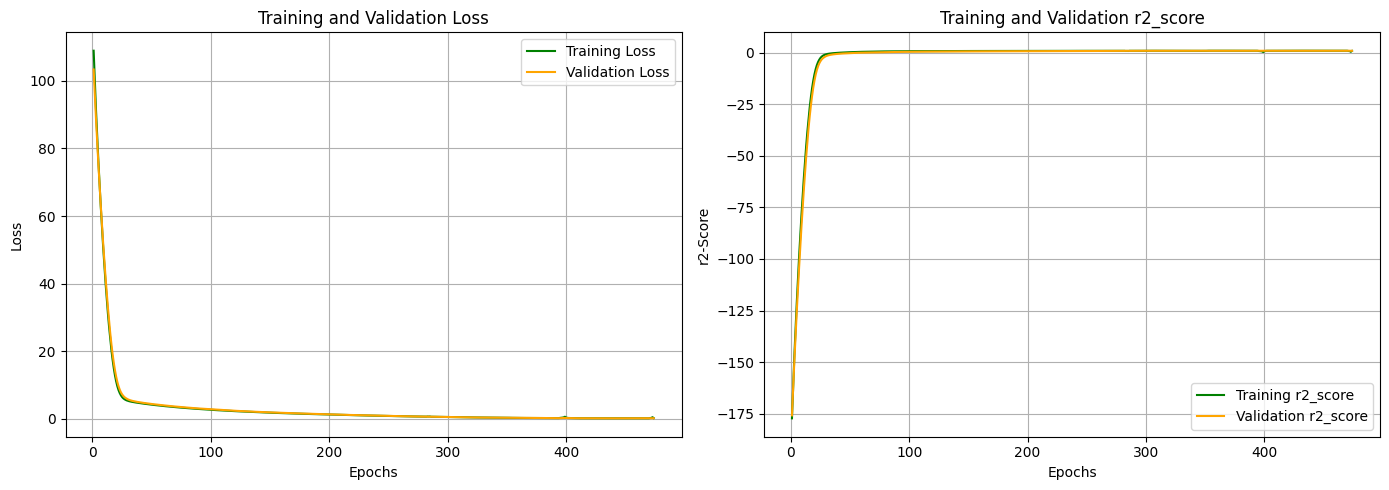

In [85]:

from keras.regularizers import l2, l1

# Def5ne the model
model5 = Sequential()
model5.add(Input(shape=(X_train_models.shape[1],)))
# Utilizar He Normal para la inicialización de pesos
model5.add(Dense(X_test_models.shape[1], activation='relu', kernel_regularizer=l1(0.01)))
model5.add(Dense(1))

# Compile the model
model5.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['r2_score'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=20, verbose=1, restore_best_weights=True)

# Train the model
history = model5.fit(X_train_models, Y_train, epochs=800, batch_size=64, validation_split=0.2, verbose=2, callbacks=[early_stopping])

# Evaluate the mo5el
loss = model5.evaluate(X_train_models, Y_train)
print("Train Loss:", loss)

# Plot learning curves (assuming 'plot_curves' is previously defined)
plot_curves(history)

In [88]:
plot_curves(history[:25])

TypeError: 'History' object is not subscriptable

In [89]:
history

In [86]:
model5.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 59)             │         3,540 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,802 (42.20 KB)

 Trainable params: 3,600 (14.06 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,202 (28.14 KB)

### Sisè model

In [ ]:

    from keras.regularizers import l2, l1

    # Def5ne the model
    model6 = Sequential()
    model6.add(Input(shape=(X_train_models.shape[1],)))
    # Utilizar He Normal para la inicialización de pesos
    model6.add(Dense(X_test_models.shape[1], activation='relu', kernel_regularizer=l1(0.01)))
    model6.add(Dense(1))

    # Compile the model
    model6.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['r2_score'])

    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=20, verbose=1, restore_best_weights=True)

    # Train the model
    history = model6.fit(X_train_models, Y_train, epochs=800, batch_size=64, validation_split=0.2, verbose=2, callbacks=[early_stopping])

    # Evaluate the mo5el
    loss = model3.evaluate(X_train_models, Y_train)
    print("Train Loss:", loss)

    # Plot learning curves (assuming 'plot_curves' is previously defined)
    plot_curves(history)

---

## Model guanyador i conclusions
---